# Import libraries and read data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read data
orders = pd.read_csv('orders.csv')
order_details = pd.read_csv('order_details.csv')
pizzas = pd.read_csv('pizzas.csv')

# Display the entire content of each dataset
print("Orders dataset:")
print(orders)

print("\nOrder Details dataset:")
print(order_details)

print("\nPizzas dataset:")
print(pizzas)


Orders dataset:
       order_id        date      time
0             1  2015-01-01  11:38:36
1             2  2015-01-01  11:57:40
2             3  2015-01-01  12:12:28
3             4  2015-01-01  12:16:31
4             5  2015-01-01  12:21:30
...         ...         ...       ...
21345     21346  2015-12-31  20:51:07
21346     21347  2015-12-31  21:14:37
21347     21348  2015-12-31  21:23:10
21348     21349  2015-12-31  22:09:54
21349     21350  2015-12-31  23:02:05

[21350 rows x 3 columns]

Order Details dataset:
       order_details_id  order_id       pizza_id  quantity
0                     1         1     hawaiian_m         1
1                     2         2  classic_dlx_m         1
2                     3         2  five_cheese_l         1
3                     4         2    ital_supr_l         1
4                     5         2     mexicana_m         1
...                 ...       ...            ...       ...
48615             48616     21348  ckn_alfredo_m         1
48616 

# Create a new column with the year-month format

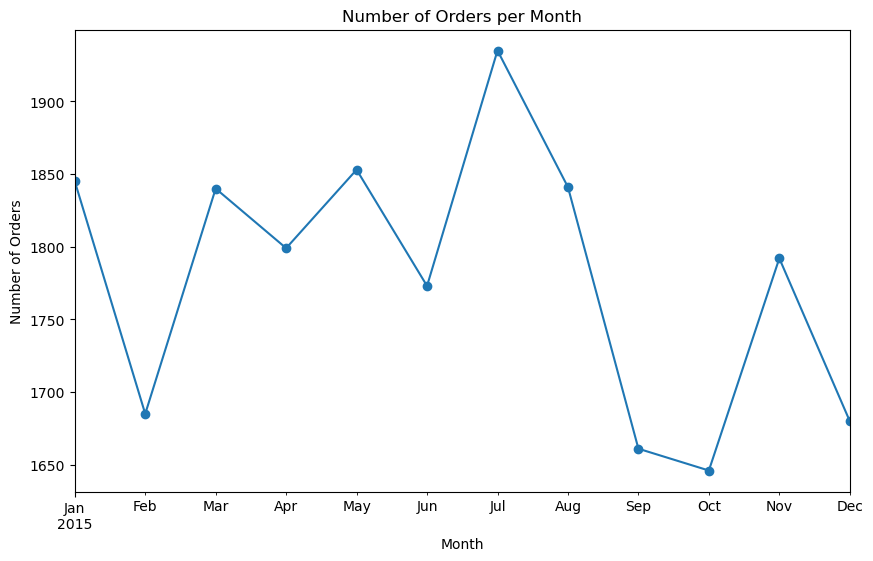

Month with the highest number of orders: 2015-07


In [5]:
# Convert the 'date' column to datetime format
orders['date'] = pd.to_datetime(orders['date'])

# Create a new column 'year_month'
orders['year_month'] = orders['date'].dt.to_period('M')

# Count the number of orders for each month
monthly_orders = orders.groupby('year_month')['order_id'].count()

# Create a line chart
plt.figure(figsize=(10, 6))
monthly_orders.plot(kind='line', marker='o')
plt.title('Number of Orders per Month')
plt.xlabel('Month')
plt.ylabel('Number of Orders')
plt.show()

# Summary of the month with the highest number of orders
highest_month = monthly_orders.idxmax()
print(f"Month with the highest number of orders: {highest_month}")


#  Identify peak hours

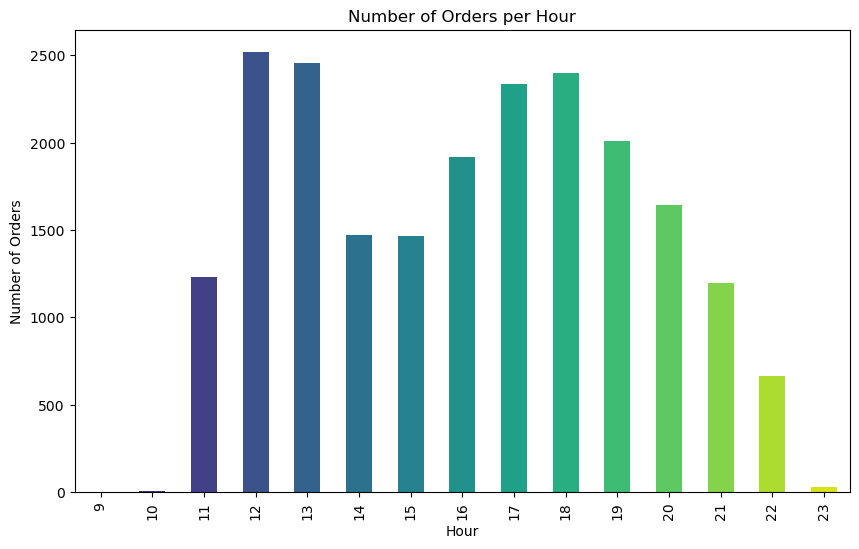

Peak hours: 12


In [4]:
# Create a dataset based on the hour (hourly)
orders['hour'] = orders['time'].apply(lambda x: int(x.split(':')[0]))

# Count the number of orders for each hour
hourly_orders = orders.groupby('hour')['order_id'].count()

# Create a colored bar plot
plt.figure(figsize=(10, 6))
hourly_orders.plot(kind='bar', color=sns.color_palette("viridis", len(hourly_orders)))
plt.title('Number of Orders per Hour')
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.show()

# Summary of peak hours
peak_hour = hourly_orders.idxmax()
print(f"Peak hours: {peak_hour}")


# Total quantity of each pizza_type_id

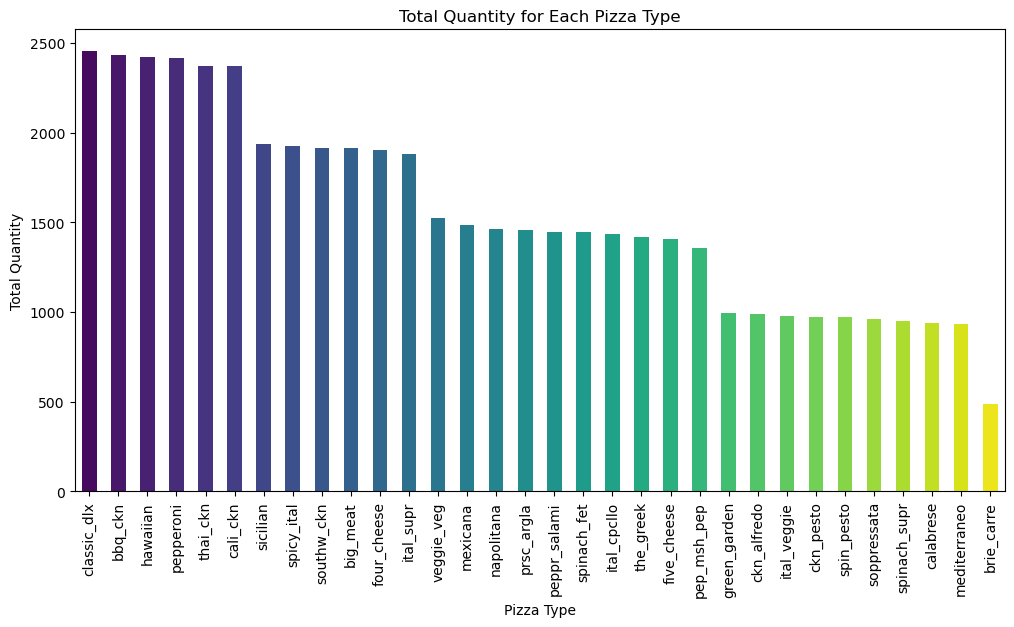

Most ordered pizza: classic_dlx


In [9]:
# Merge order_details with pizzas
merged_data = pd.merge(order_details, pizzas, on='pizza_id')

# Calculate the total quantity for each pizza_type_id
pizza_quantity = merged_data.groupby('pizza_type_id')['quantity'].sum()

# Create a colored bar plot
plt.figure(figsize=(12, 6))
pizza_quantity.sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("viridis", len(pizza_quantity)))
plt.title('Total Quantity for Each Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Total Quantity')
plt.show()

# Summary of the most ordered pizza
most_ordered_pizza = pizza_quantity.idxmax()
print(f"Most ordered pizza: {most_ordered_pizza}")


# Percentage contribution of each pizza size (Pie Chart)

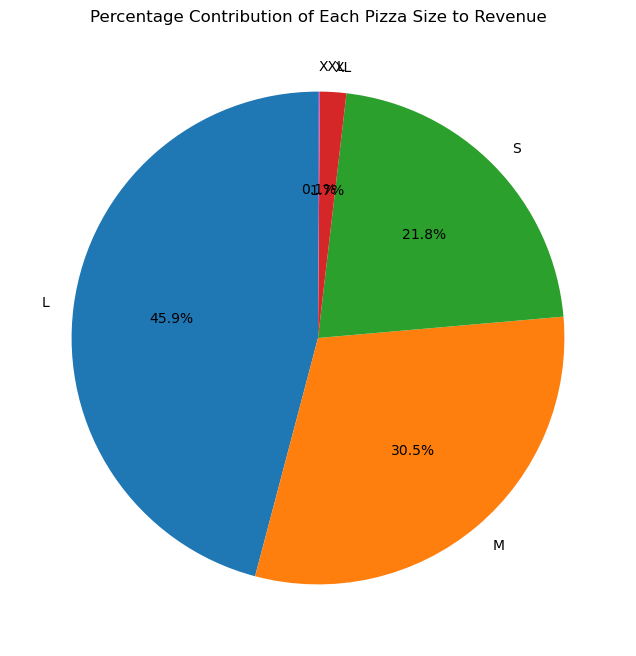

Summary of Revenue for Each Pizza Size:
size
L      375318.70
M      249382.25
S      178076.50
XL      14076.00
XXL      1006.60
Name: revenue, dtype: float64


In [5]:
# Calculate revenue for each pizza size
merged_data['revenue'] = merged_data['quantity'] * merged_data['price']

# Calculate total revenue for each pizza size
size_revenue = merged_data.groupby('size')['revenue'].sum()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(size_revenue, labels=size_revenue.index, autopct='%1.1f%%', startangle=90)
plt.title('Percentage Contribution of Each Pizza Size to Revenue')
plt.show()

# Summary of revenue for each pizza size
print("Summary of Revenue for Each Pizza Size:")
print(size_revenue)


# Total revenue from each pizza_type (Bar Plot)

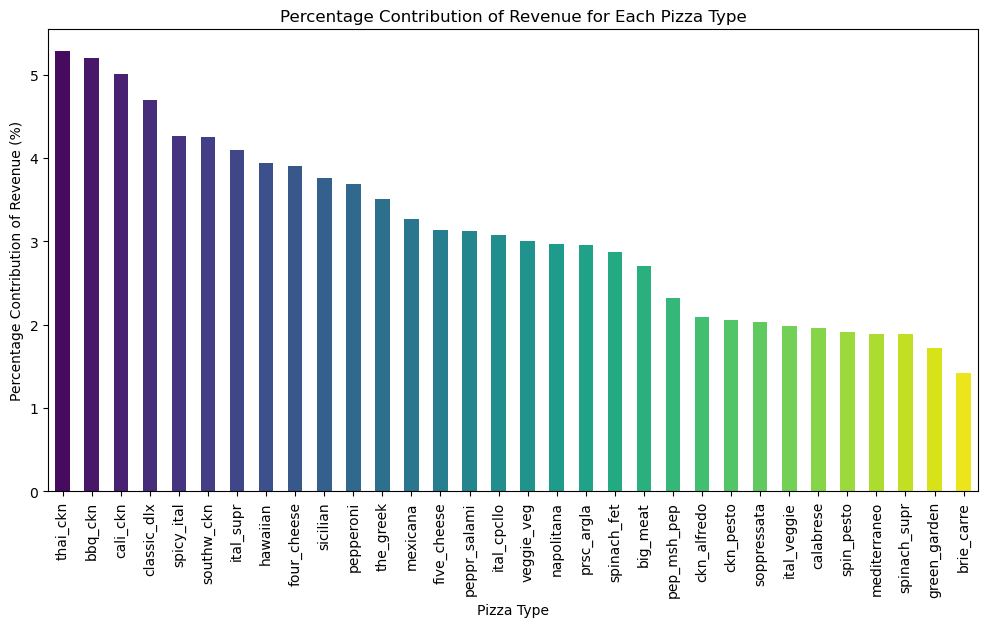

Summary of Percentage Contribution of Revenue for Each Pizza Type:
pizza_type_id
bbq_ckn         5.197740
big_meat        2.709913
brie_carre      1.415559
calabrese       1.965690
cali_ckn        5.008637
ckn_alfredo     2.092289
ckn_pesto       2.055597
classic_dlx     4.692531
five_cheese     3.135067
four_cheese     3.910631
green_garden    1.723248
hawaiian        3.935652
ital_cpcllo     3.072718
ital_supr       4.097072
ital_veggie     1.986515
mediterraneo    1.890779
mexicana        3.272420
napolitana      2.974083
pep_msh_pep     2.320235
pepperoni       3.683328
peppr_salami    3.127522
prsc_argla      2.952791
sicilian        3.756338
soppressata     2.037890
southw_ckn      4.249888
spicy_ital      4.260082
spin_pesto      1.918867
spinach_fet     2.870678
spinach_supr    1.885916
thai_ckn        5.278699
the_greek       3.512724
veggie_veg      3.008904
Name: price, dtype: float64


In [10]:
# Calculate revenue for each pizza_type
type_revenue = merged_data.groupby('pizza_type_id')['price'].sum()

# Calculate the percentage contribution of revenue for each pizza_type
type_percentage = (type_revenue / type_revenue.sum()) * 100

# Create a colored bar plot
plt.figure(figsize=(12, 6))
type_percentage.sort_values(ascending=False).plot(kind='bar', color=sns.color_palette("viridis", len(type_percentage)))
plt.title('Percentage Contribution of Revenue for Each Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Percentage Contribution of Revenue (%)')
plt.show()

# Summary of the percentage contribution of revenue for each pizza_type
print("Summary of Percentage Contribution of Revenue for Each Pizza Type:")
print(type_percentage)


# Daily/Weekly Trend Analysis

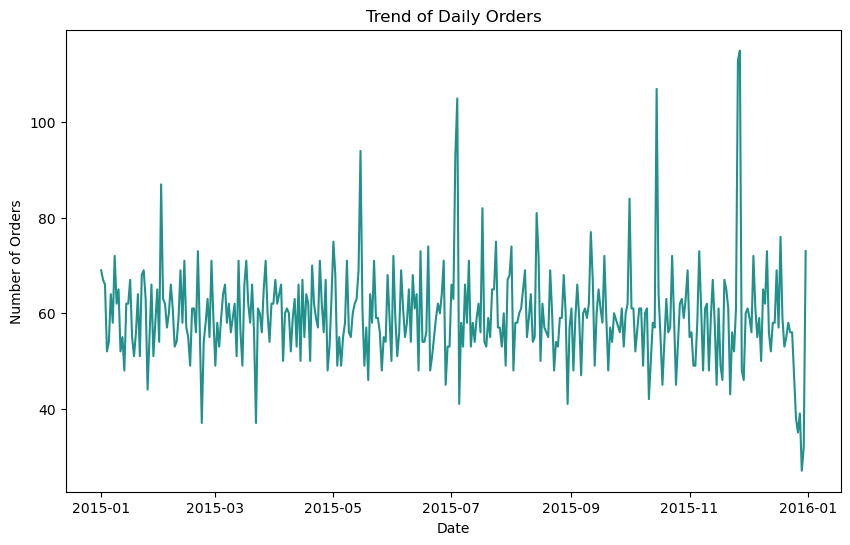

Highest daily orders occurred on: 2015-11-27 00:00:00
Overall trend: increasing


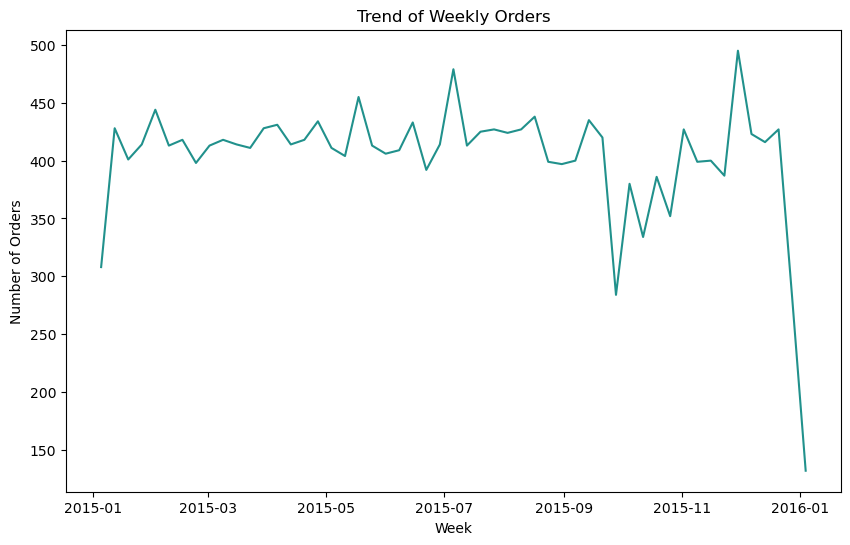

Highest weekly orders occurred on week starting: 2015-11-30 00:00:00
Overall trend: decreasing


In [2]:
# Convert 'date' column to datetime format
orders['date'] = pd.to_datetime(orders['date'])

# Daily Trend Analysis
daily_orders = orders.groupby('date')['order_id'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=daily_orders.index, y=daily_orders.values, color=sns.color_palette("viridis", 1)[0])
plt.title('Trend of Daily Orders')
plt.xlabel('Date')
plt.ylabel('Number of Orders')
plt.show()

# Daily Trend Summary
highest_daily_orders_date = daily_orders.idxmax()
print(f"Highest daily orders occurred on: {highest_daily_orders_date}")
print(f"Overall trend: {'increasing' if daily_orders.diff().mean() > 0 else 'decreasing'}")

# Weekly Trend Analysis
weekly_orders = orders.resample('W-Mon', on='date')['order_id'].count()
plt.figure(figsize=(10, 6))
sns.lineplot(x=weekly_orders.index, y=weekly_orders.values, color=sns.color_palette("viridis", 1)[0])
plt.title('Trend of Weekly Orders')
plt.xlabel('Week')
plt.ylabel('Number of Orders')
plt.show()

# Weekly Trend Summary
highest_weekly_orders_week = weekly_orders.idxmax()
print(f"Highest weekly orders occurred on week starting: {highest_weekly_orders_week}")
print(f"Overall trend: {'increasing' if weekly_orders.diff().mean() > 0 else 'decreasing'}")

# Pizza Price Variation Analysis

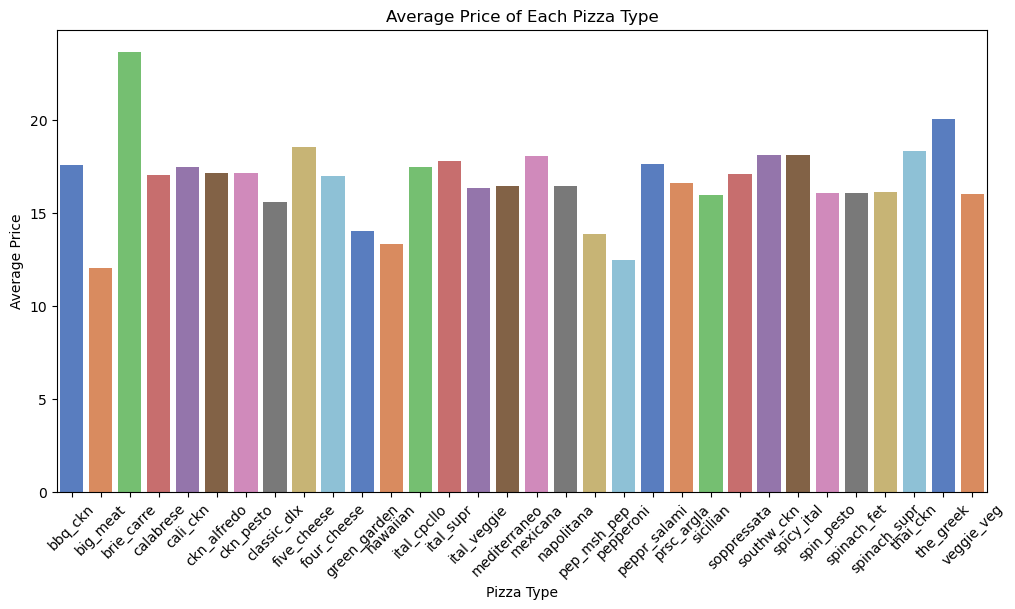

Most expensive pizza type: brie_carre
Least expensive pizza type: big_meat


In [3]:
# Merge order_details with pizzas
merged_data = pd.merge(order_details, pizzas, on='pizza_id')

# Analyze Pizza Price Variation
pizza_prices = merged_data.groupby('pizza_type_id')['price'].mean()

# Create a colored bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=pizza_prices.index, y=pizza_prices.values, palette="muted")
plt.title('Average Price of Each Pizza Type')
plt.xlabel('Pizza Type')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Summary of Pizza Price Variation
most_expensive_pizza = pizza_prices.idxmax()
print(f"Most expensive pizza type: {most_expensive_pizza}")
print(f"Least expensive pizza type: {pizza_prices.idxmin()}")